In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/penbased-recognition-of-handwritten-digits/penbased-5an-nn.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
data = pd.read_csv('/kaggle/input/penbased-recognition-of-handwritten-digits/penbased-5an-nn.csv')
data.head()

,0,57,31,68,72,90,100,100.1,76,75,50,51,28,25,16,0,1
0,99,80,63,100,25,76,79,68,100,62,97,23,54,0,0,16,9
1,0,73,19,99,72,100,70,73,32,48,5,18,46,0,100,72,2
2,12,77,20,62,78,40,50,0,1,17,0,64,23,98,100,100,5
3,0,98,36,42,80,85,68,42,56,0,25,23,50,37,100,32,7
4,29,91,6,57,66,39,30,0,81,19,3,72,39,97,100,100,5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10991 entries, 0 to 10990
Data columns (total 17 columns):
0         10991 non-null int64
 57       10991 non-null int64
 31       10991 non-null int64
 68       10991 non-null int64
 72       10991 non-null int64
 90       10991 non-null int64
 100      10991 non-null int64
 100.1    10991 non-null int64
 76       10991 non-null int64
 75       10991 non-null int64
 50       10991 non-null int64
 51       10991 non-null int64
 28       10991 non-null int64
 25       10991 non-null int64
 16       10991 non-null int64
 0        10991 non-null int64
 1        10991 non-null int64
dtypes: int64(17)
memory usage: 1.4 MB


In [7]:
data.isnull().sum()

0         0
 57       0
 31       0
 68       0
 72       0
 90       0
 100      0
 100.1    0
 76       0
 75       0
 50       0
 51       0
 28       0
 25       0
 16       0
 0        0
 1        0
dtype: int64

In [8]:
X = data.iloc[:,:-1]
X.head()

,0,57,31,68,72,90,100,100.1,76,75,50,51,28,25,16,0
0,99,80,63,100,25,76,79,68,100,62,97,23,54,0,0,16
1,0,73,19,99,72,100,70,73,32,48,5,18,46,0,100,72
2,12,77,20,62,78,40,50,0,1,17,0,64,23,98,100,100
3,0,98,36,42,80,85,68,42,56,0,25,23,50,37,100,32
4,29,91,6,57,66,39,30,0,81,19,3,72,39,97,100,100


Text(0, 0.5, 'Power spectral density (normalized)')

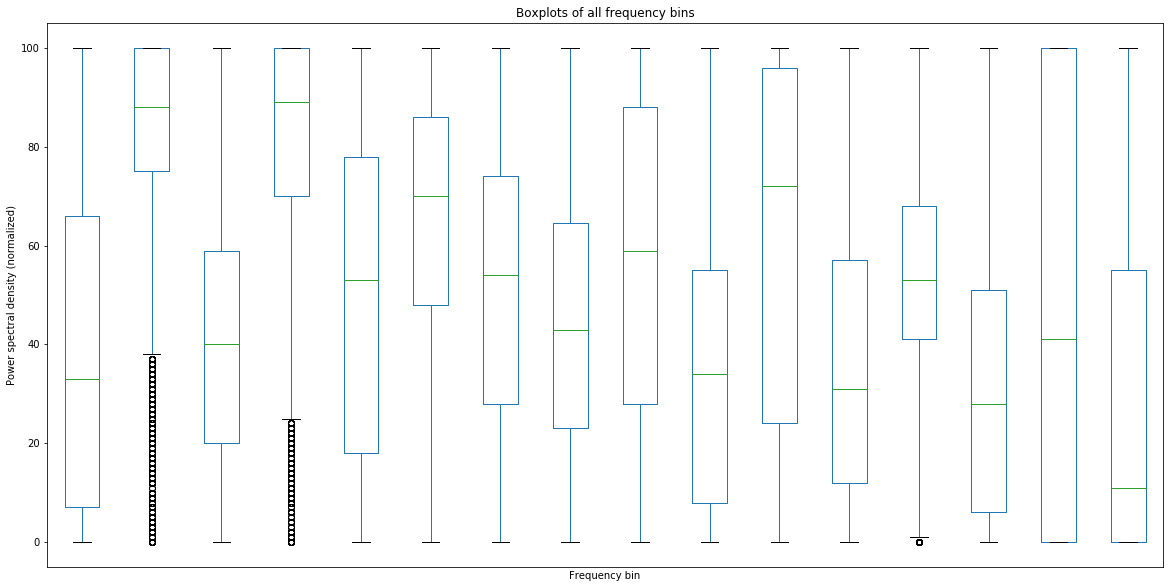

In [9]:
X.plot.box(figsize=(20,10),xticks=[])
plt.title('Boxplots of all frequency bins')
plt.xlabel('Frequency bin')
plt.ylabel('Power spectral density (normalized)')

In [10]:
X.describe()

,0,57,31,68,72,90,100,100.1,76,75,50,51,28,25,16,0
count,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000
mean,39.508871,83.221545,41.047402,82.075789,49.762351,64.790738,51.256937,44.672550,56.447457,34.553362,60.087799,35.705031,54.604495,35.654990,47.384678,29.787644
std,34.184852,19.043429,26.652911,21.033956,33.840402,27.323980,30.510892,29.880944,33.935001,27.597455,36.955062,27.482024,22.819212,33.128173,41.268168,35.722195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,75.000000,20.000000,70.000000,18.000000,48.000000,28.000000,23.000000,28.000000,8.000000,24.000000,12.000000,41.000000,6.000000,0.000000,0.000000
50%,33.000000,88.000000,40.000000,89.000000,53.000000,70.000000,54.000000,43.000000,59.000000,34.000000,72.000000,31.000000,53.000000,28.000000,41.000000,11.000000
75%,66.000000,100.000000,59.000000,100.000000,78.000000,86.000000,74.000000,64.500000,88.000000,55.000000,96.000000,57.000000,68.000000,51.000000,100.000000,55.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [11]:
y = data.iloc[:,-1]
y.head()

0    9
1    2
2    5
3    7
4    5
Name:  1, dtype: int64

## Select Model

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

accuracy is:  96.27046694966647 for k_value: 1
accuracy is:  95.57307459066101 for k_value: 2
accuracy is:  96.42207398423287 for k_value: 3
accuracy is:  96.30078835657974 for k_value: 4
accuracy is:  96.33110976349303 for k_value: 5
accuracy is:  96.02789569436023 for k_value: 6
accuracy is:  96.11885991510006 for k_value: 7
accuracy is:  96.0582171012735 for k_value: 8
accuracy is:  95.84596725288054 for k_value: 9



Text(0, 0.5, 'test accuracy')

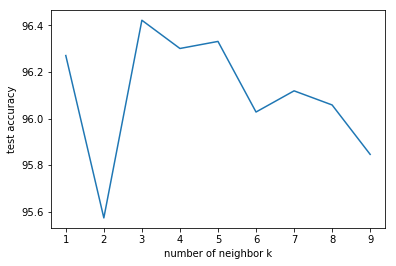

In [14]:
list_k = []
list_acc = []
for k_value in range(1,10):
    list_k.append(k_value)
    model = KNeighborsClassifier(n_neighbors=k_value)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)*100
    list_acc.append(acc)
    print('accuracy is: ',acc,'for k_value:',k_value)
vitri = list_acc.index(max(list_acc))
k = list_k[vitri]
print('')
plt.plot(list_k,list_acc)
plt.xlabel('number of neighbor k')
plt.ylabel('test accuracy')

In [15]:
models = [
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(),
    SVC(),
]

In [17]:
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
i=0
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, y_train, cv=CV) 
    entries.append([model_name, accuracies.mean()])
    i += 1
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])

KeyboardInterrupt: 

In [18]:
cv_df

""
0
1
2
3
4
5
6
7
8
9


KNN and DecisionTree have high accuracy

Fit KNN model

In [19]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train,y_train)
y_pred_knn = model_knn.predict(X_test)
print('accuracy:',accuracy_score(y_test,y_pred_knn))
print("training score:",model_knn.score(X_train,y_train))
print("test score:",model_knn.score(X_test,y_test))

accuracy: 0.9642207398423287
training score: 0.978161965423112
test score: 0.9642207398423287


In [ ]:
confusion_matrix(y_test,y_pred_knn)

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_knn))

In [ ]:
print(classification_report(y_test,y_pred_knn))

Fit DecisionTree model

In [26]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred_1=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred_1))
print("training score:",clf.score(X_train,y_train))
print("test score:",clf.score(X_test,y_test))

Accuracy: 0.8941782898726501
training score: 1.0
test score: 0.8941782898726501


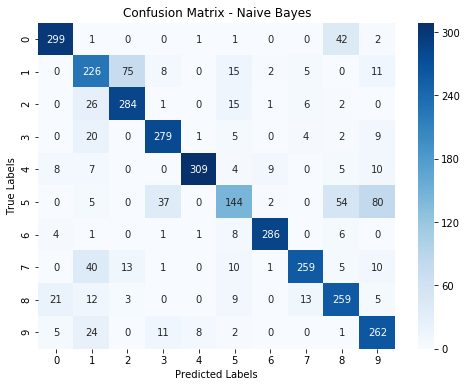

In [23]:
nb_cm = confusion_matrix(y_test, y_pred_2)
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [21]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)

y_pred_3 = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_3))
print("Training score:", clf.score(X_train, y_train))
print("Test score:", clf.score(X_test, y_test))


Accuracy: 0.10400242571255307
Training score: 1.0
Test score: 0.10400242571255307


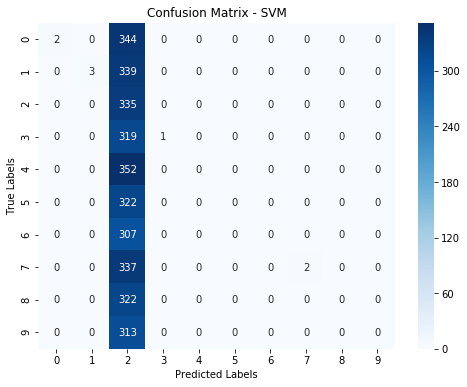

In [24]:
svm_cm = confusion_matrix(y_test, y_pred_3)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [22]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred_4 = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_4))
print("Training score:", clf.score(X_train, y_train))
print("Test score:", clf.score(X_test, y_test))


Accuracy: 0.9569436021831413
Training score: 0.9994800467957884
Test score: 0.9569436021831413


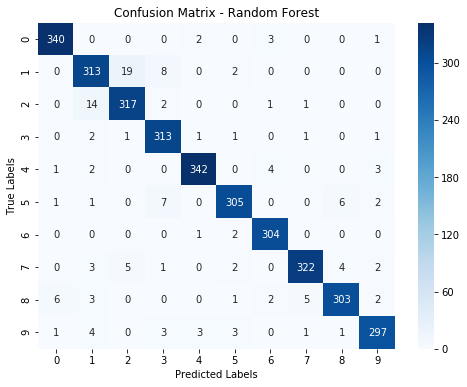

In [25]:
rf_cm = confusion_matrix(y_test, y_pred_4)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()